In the last project, we explored an iterative technique for model fitting named **gradient descent**. The gradient descent algorithm requires multiple iterations to converge on the optimal parameter values and the number of iterations is highly dependent on the initial parameter values and the learning rate we select.

In this project, we'll explore a technique called **ordinary least squares estimation** or **OLS estimation** for short. Unlike gradient descent, OLS estimation provides a clear formula to directly calculate the optimal parameter values that minimize the cost function. 

To understand OLS estimation, we need to first frame our linear regression problem in the matrix form. We've mostly worked with the following form of the linear regression model:

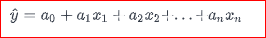

While this form represents the relationship between the features ($x_1$ to $x_n$) and the target column (`y`) well when there are just a few parameter values, it doesn't scale well when we have hundreds of parameters.

If we recall from the Linear Algebra , we explored how matrix notation lets us better represent and reason about a linear system with many variables. With that in mind, here's what the matrix form of our linear regression model looks like:

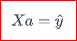

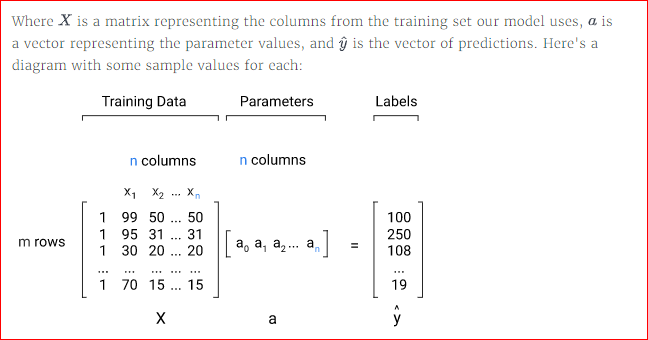

Now that we've gained an understanding for the matrix representation of the linear regression model, let's take a peek at the OLS estimation formula that results in the optimal vector $a$ : 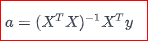

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area', 
            'Gr Liv Area', 'Overall Qual']
x = train[features]
y = train['SalePrice']

In [11]:
# OLS estimation formula to return the optimal parameter values.

firts_term = np.linalg.inv(np.dot(x.T, x)) # or np.linalg.inv(np.dot(np.transpose(x), x)

second_term = np.dot(x.T,y) # or np.dot(np.transpose(x),y)

ols_estimation = np.dot(firts_term,second_term)
ols_estimation

array([   53.75693376, 18232.31375751, -6434.65300989,    22.53151963,
          86.81522574,    28.08976713, 11397.64135314])

In [13]:
print(len(ols_estimation))
print(len(features))

7
7


Unlike gradient descent, **OLS estimation** provides what is known as a **closed form solution** to the problem of finding the optimal parameter values. 
* A closed form solution is one where a solution can be computed arithmetically with a predictable amount of mathematical operations.
* Gradient descent, on the other hand, is an algorithmic approach that can require a different number of iterations (and therefore a different number of mathematical operations) based on the **initial parameter values**, **the learning rate**, etc. 

While the approach is different, both techniques share the high level objective of minimizing the cost function.

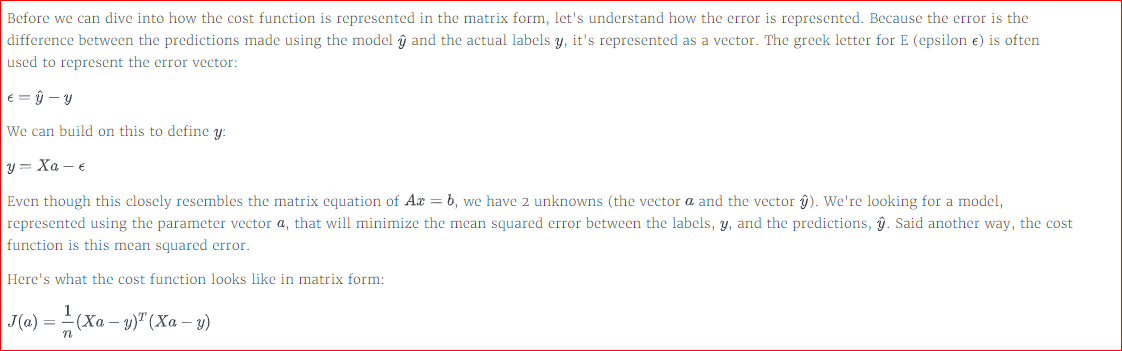

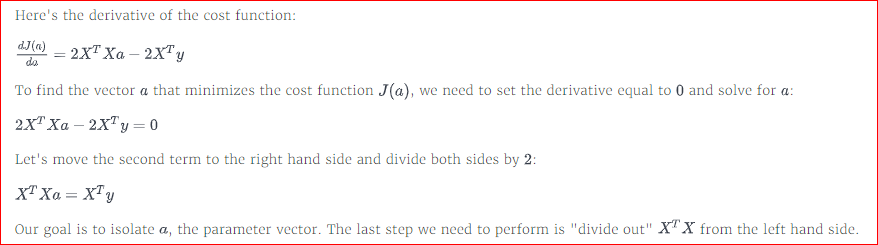

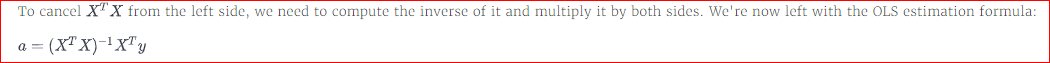

Now that we've explored a lot of the math that underlies **OLS estimation**, let's understand its limitations. 
* The biggest limitation is that **OLS estimation** is computationally expensive when the data is large. This is because computing a matrix inverse has a computational complexity of approximately `O(n^3)`. 
* We can read more about computational complexity of the matrix inverse and other common matrix operations on [Wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra).

**OLS** is commonly used when the number of elements in the dataset (and therefore the matrix that's inverted) is less than a few million elements. 

On larger datasets, gradient descent is used because it's much more flexible. For many practical problems, we can set a threshold accuracy value (or a set number of iterations) and use a **good enough** solution. This is especially useful when iterating and trying different features in our model.

In this project, we explored a **closed form solution** to fitting a linear regression model called **OLS estimation**. We explored some of the intuition behind the math for this technique and ended by exploring its computational complexity.